In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

Q1

In [26]:
# 3

def nn_layer(x, w, b, f):
    return f(x@w + b)

def ff_nn_ReLu(x, params):
    h = nn_layer(x, params[0], params[1], tf.nn.relu)
    yhat = nn_layer(h, params[2], params[3], tf.nn.sigmoid)
    return yhat

x = np.matrix([[1, -1], [0, -1], [0,1]])
w = np.matrix([[1, -1, 0, 1], [0, 0, 0.5, 1]])
b = np.matrix([0, 0, 1, 0])
v = np.matrix([1, 0, -1, 1]).T
c = np.matrix([1])
yhat = ff_nn_ReLu(x, [w, b, v, c])

yhat

<tf.Tensor: shape=(3, 1), dtype=float64, numpy=
array([[1.5],
       [0.5],
       [0.5]])>

In [34]:
2*3**3

54

Q2

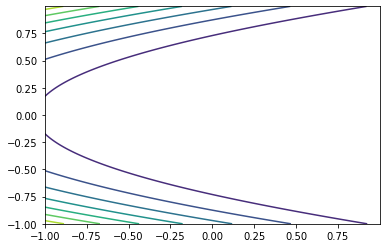

In [107]:
delta = 0.001
x = np.arange(-1.0, 1.0, delta)
y = np.arange(-1.0, 1.0, delta)
X, Y = np.meshgrid(x, y)
Z = (3-X**3) + 50*(2*Y**2 - X)**2
fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z)

In [110]:
def grad_f(vector):
    x, y = vector
    df_dx = -3*x**2 + 100*x - 200*y**2
    df_dy = 50*(16*y**3-8*x*y)
    return np.array([df_dx, df_dy])

def grad_descent(starting_point=None, iterations=10, learning_rate=12):
    # your code here
    # be sure to store and return the entire trajectory -- i.e. the results at
    # each step -- as a list or array 
    if starting_point is None:
        point = np.random.uniform(-1, 1, size = 2)
    else:
        point = starting_point
    trajectory = [point]
    for i in range(iterations):
        grad = grad_f(point)
        point = point - learning_rate * grad
        trajectory.append(point)
        
    return np.array(trajectory)

np.random.seed(10)
traj = grad_descent(iterations=10, learning_rate=0.001)
traj

array([[ 0.54264129, -0.9584961 ],
       [ 0.67300349, -0.4620763 ],
       [ 0.64976485, -0.50753989],
       [ 0.63757429, -0.53486002],
       [ 0.63225141, -0.54885705],
       [ 0.63047431, -0.55539137],
       [ 0.63031129, -0.55840274],
       [ 0.63083476, -0.5598957 ],
       [ 0.63164178, -0.56076205],
       [ 0.63256533, -0.56137522],
       [ 0.63353764, -0.56188743]])

In [115]:
for pair in traj:
    x = pair[0]
    y = pair[1]
    z = (3-x**3) + 50*(2*y**2 - x)**2
    print(z) 

86.66404674619079
5.720346252384516
3.631145562478478
2.9548391083203875
2.79155529636121
2.75857493694171
2.7518159932455792
2.7497059514566717
2.748366668541369
2.7471461675069233
2.7459380943688068


In [112]:
#'{0:.10f}'.format(traj[4][0])

'0.6322514145'

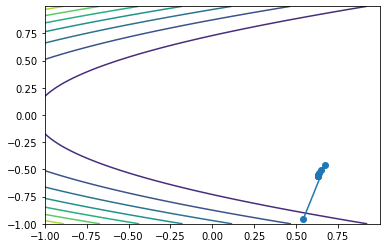

In [113]:
fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z)
x= traj[:,0]
y= traj[:,1]
plt.plot(x,y,'-o')

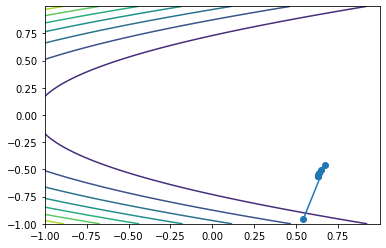

In [134]:
def grad_descent_with_momentum(starting_point=None, iterations=10, alpha=.9, epsilon=10):
    if starting_point is not None:
        point = starting_point
    else:
        point = np.random.uniform(-1, 1, size = 2)
    
    trajectory = [point]
    v = np.zeros(point.size)
    
    for i in range(iterations):
        grad = grad_f(point)
        v = alpha * v + epsilon * grad
        point = point - v
        trajectory.append(point)
        
    return np.array(trajectory)

np.random.seed(10)
traj = grad_descent_with_momentum(iterations=10, epsilon=0.001, alpha=0.001)

fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z)
x= traj[:,0]
y= traj[:,1]
plt.plot(x,y,'-o')

In [135]:
traj

array([[ 0.54264129, -0.9584961 ],
       [ 0.67300349, -0.4620763 ],
       [ 0.64989521, -0.50704347],
       [ 0.63756829, -0.53461259],
       [ 0.63218073, -0.54874261],
       [ 0.63037992, -0.55532932],
       [ 0.6302104 , -0.55835659],
       [ 0.6307331 , -0.55985294],
       [ 0.63154085, -0.5607194 ],
       [ 0.63246535, -0.5613322 ],
       [ 0.63343855, -0.56184423]])